#  Práctica Obligatoria - Parte III - CNN

***<p style="text-align:center;">Aprendizaje Automático II</p>***
***<p style="text-align:center;">CNNs</p>***

En esta parte, entrenarás varias redes CNNs y analizarás sus resultados en el dataset GTS.


### Evaluación - 4/10 puntos

Puntuación de cada parte sobre el total de la práctica:
- **[Ejercicio 1]** 0.25 puntos.
- **[Ejercicio 2]** 0.25 puntos.
- **[Ejercicio 3]** 0.5 puntos.
- **[Ejercicio 4]** 3 puntos.

In [ ]:
!unzip data.zip

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.utils.data import DataLoader
from torchvision import transforms

from gts_dataset import GTS


## Importa las funciones que has creado desde `utils.py`:

In [3]:
from utils import count_trainable_params, train, evaluate, train_and_evaluate, save_full_model, load_full_model, plot_loss_accuracy, plot_confusion_matrix, plot_error_per_class

## Carga el dataset GTS  y crea los dataloaders:

In [9]:
# Definir las transformaciones y conversión a tensor
transform = transforms.Compose([
    transforms.ToTensor(),
])

train_dataset = GTS(csv_file='train.csv', root_dir='./data', transform=transform)
valid_dataset = GTS(csv_file='valid.csv', root_dir='./data', transform=transform)
test_dataset = GTS(csv_file='test.csv', root_dir='./data', transform=transform)

device = 'cpu'
batch_size = 16

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=4)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


## **[Ejercicio 1]** Crea un modelo `CNN` con las siguientes características:

1. Tres bloques convolucionales (conv2d -> batch norm -> ReLU).
2. Flatten para aplanar características.
3. Una capa densa para clasificación.
4. Comprueba el número de parámetros entrenables y busca una configuración que no supere los **50.000** parámetros (aproximadamente 4 veces menos que la MLP).

In [ ]:
class CNN(nn.Module):
    def __init__(self, ouput_dim):
        super(CNN, self).__init__()


        # Primer bloque convolucional
        self.block1 = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, padding=1),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)  # Reduce la dimensión espacial a la mitad
        )


        # Segundo bloque convolucional
        self.block2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)  # Reduce la dimensión espacial a la mitad
        )

        # Tercer bloque convolucional
        self.block3 = nn.Sequential(
           nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)  # Reduce la dimensión espacial a la mitad
        )

        # Capa de aplanado
        self.flatten = nn.Flatten()

        # Linear para la clasificación
        self.linear = nn.Linear(576, ouput_dim)

    def forward(self, x):

        # Primer bloque convolucional
        x = self.block1(x)

        # Segundo bloque convolucional
        x = self.block2(x)

        # Tercer bloque convolucional
        x = self.block3(x)

        # Aplanar la salida de la última capa convolucional
        x = self.flatten(x)

        # Linear para clasificación
        x = self.linear(x)

        return x

count_trainable_params(CNN(ouput_dim=43))

48619

Guarda el modelo en `models.py`

### Entrena el modelo CNN con las funciones que has importado y analiza los resultados:

Epoch [1/10], Train Loss: 1.0135, Train Accuracy: 0.7217, Validation Loss: 0.2835, Validation Accuracy: 0.9301
Epoch [2/10], Train Loss: 0.1797, Train Accuracy: 0.9519, Validation Loss: 0.1665, Validation Accuracy: 0.9516
Epoch [3/10], Train Loss: 0.0969, Train Accuracy: 0.9728, Validation Loss: 0.1176, Validation Accuracy: 0.9680
Epoch [4/10], Train Loss: 0.0799, Train Accuracy: 0.9775, Validation Loss: 0.1079, Validation Accuracy: 0.9688
Epoch [5/10], Train Loss: 0.0557, Train Accuracy: 0.9842, Validation Loss: 0.0824, Validation Accuracy: 0.9770
Epoch [6/10], Train Loss: 0.0443, Train Accuracy: 0.9875, Validation Loss: 0.0779, Validation Accuracy: 0.9792
Epoch [7/10], Train Loss: 0.0325, Train Accuracy: 0.9913, Validation Loss: 0.0703, Validation Accuracy: 0.9804
Epoch [8/10], Train Loss: 0.0342, Train Accuracy: 0.9900, Validation Loss: 0.0712, Validation Accuracy: 0.9811
Epoch [9/10], Train Loss: 0.0316, Train Accuracy: 0.9913, Validation Loss: 0.0799, Validation Accuracy: 0.9790
E

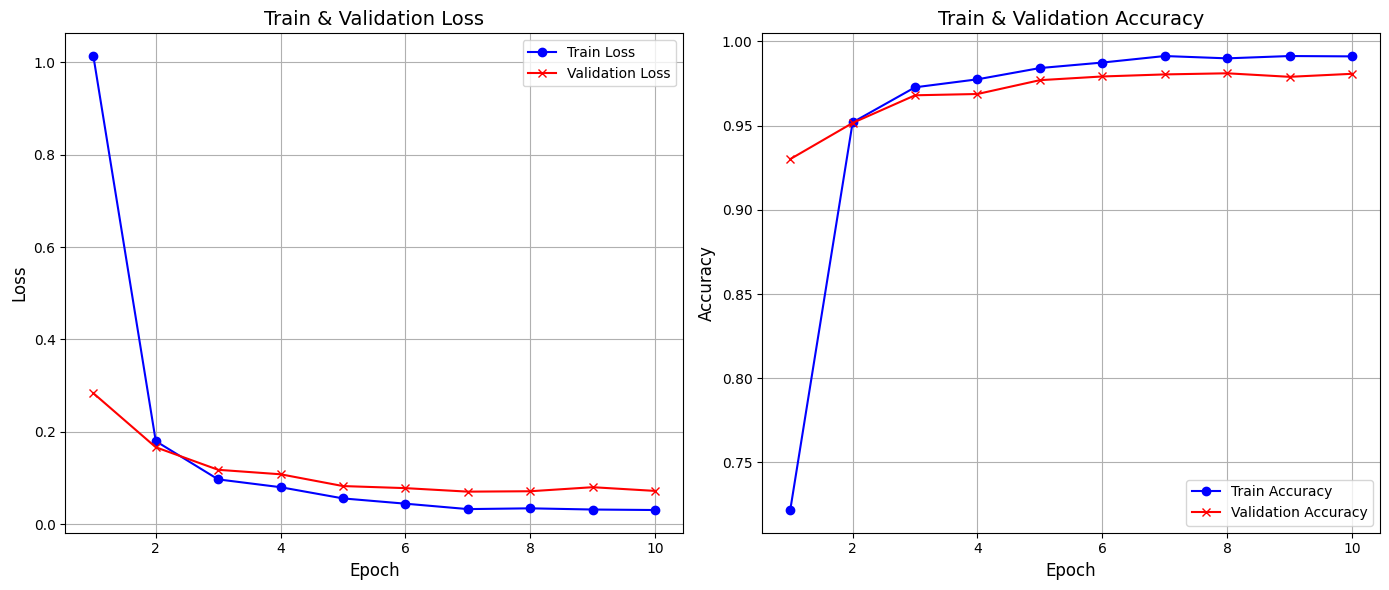

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


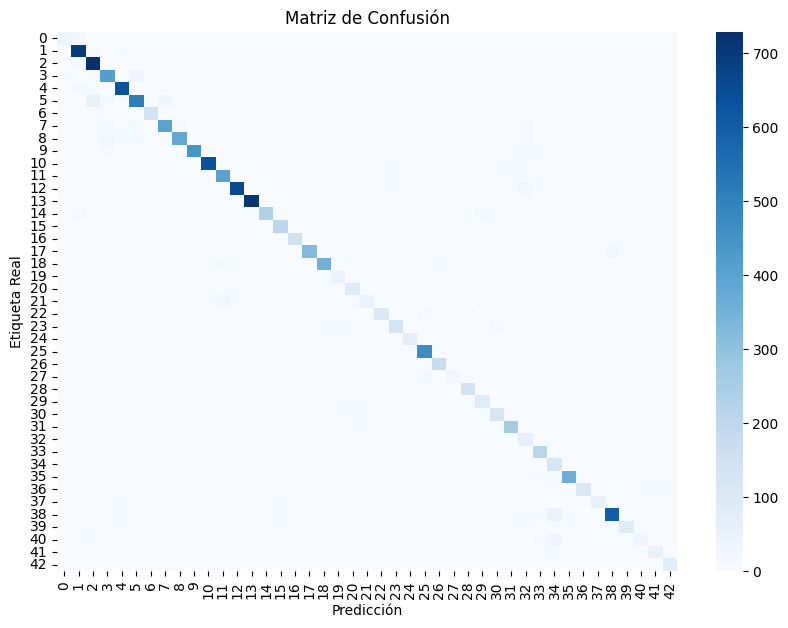

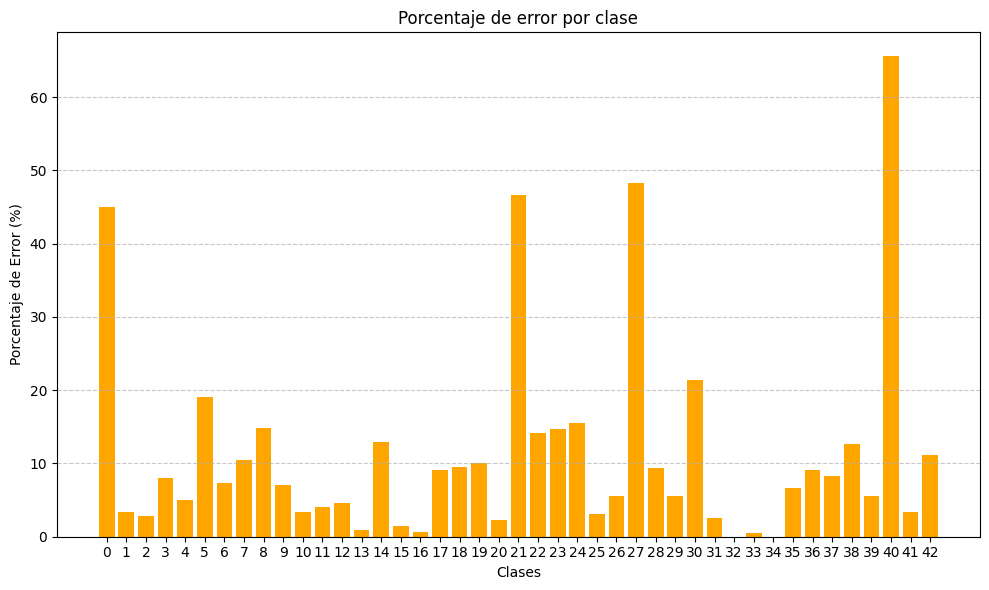

In [ ]:
# Instancia el modelo
model_cnn = CNN(ouput_dim=43)

# Instancia la función de pérdida y el optimizador
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_cnn.parameters(), lr=0.001)

# Fija 10 épocas
num_epochs = 10

# Entrena y evalua el modelo. Usa name='cnn'
train_loss_df, val_loss_df, test_loss, test_accuracy = train_and_evaluate(model_cnn, train_loader, valid_loader, loss_fn, optimizer, device, num_epochs, test_loader, name='cnn')


# Guarda el modelo con file_name='cnn.pth'
save_full_model(model_cnn, file_name='cnn.pth')


# Carga los datos y muéstralos
train_loss_file = 'train_loss_cnn.csv'
valid_loss_file = 'valid_loss_cnn.csv'
train_accuracy_file = 'train_accuracy_cnn.csv'
valid_accuracy_file = 'valid_accuracy_cnn.csv'

plot_loss_accuracy(train_loss_file, valid_loss_file, train_accuracy_file, valid_accuracy_file)

# Calcula la matriz de confusión
cm = plot_confusion_matrix(model_cnn, test_loader, device=device)

# Muestra el porcentaje de error por clase
plot_error_per_class(cm)

Describe las diferencias en los resultados que has obtenido.

La CNN supera al MLP en términos de rendimiento en todos los conjuntos, tanto en entrenamiento como en validación como en el test, además de converger más rápido, no como el MLP que tiene una mejora mas progresiva. Todo esto se debe a la capacidad para capturar características espaciales de las imágenes que tiene la CNN y no la MLP.


## **[Ejercicio 2]** Dataset permutado: re-entrena la MLP y la CNN

Esta vez, vuelve a entrenar la `MLP`y la `CNN` que has configurado pero con el mismo dataset modificado.

Esta modificación consiste en permutar los píxeles de las imágenes siempre de la misma manera.


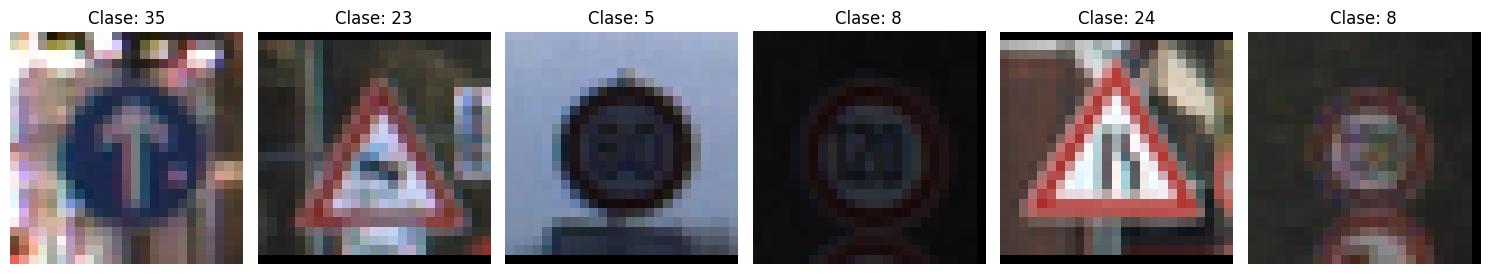

In [ ]:
def visualize_subset(dataset, num_images=6):
    """
    Visualiza ejemplos directamente de un Subset o Dataset.

    :param dataset: Dataset o Subset que contiene las imágenes y etiquetas.
    :param num_images: Número de imágenes a mostrar.
    """
    indices = np.arange(num_images)
    images = []
    labels = []

    for idx in indices:
        image, label = dataset[idx]
        images.append(image)
        labels.append(label)

    images = torch.stack(images)  # Convertir la lista de imágenes en un tensor
    images = images.permute(0, 2, 3, 1).numpy()


    # Mostrar imágenes
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    for idx in range(num_images):
        axes[idx].imshow(images[idx])
        axes[idx].set_title(f"Clase: {labels[idx]}")
        axes[idx].axis('off')
    plt.tight_layout()
    plt.show()


# Visualizar ejemplos del conjunto de entrenamiento
visualize_subset(train_dataset)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


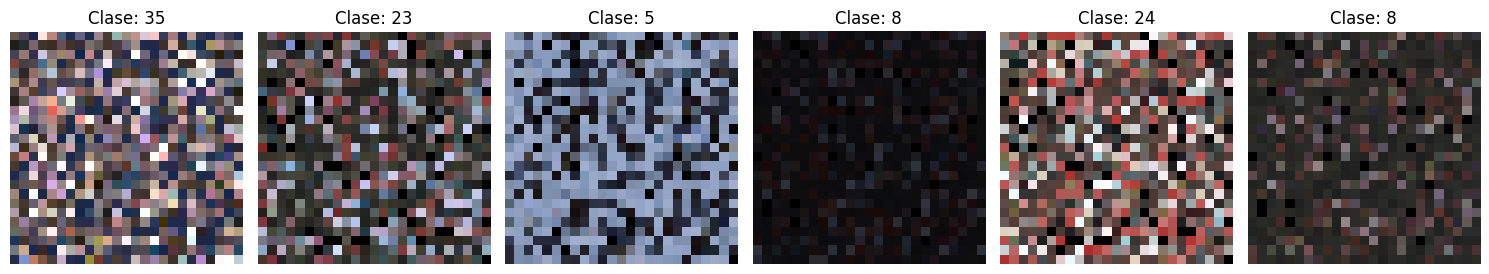

In [ ]:
class ShufflePixels:
    def __init__(self, seed=42):
        """
        Inicializa la transformación de shuffle de píxeles.
        Args:
            seed (int): Semilla para generar una permutación fija.
        """
        self.seed = seed
        torch.manual_seed(self.seed)  # Fijar la semilla
        self.permutation = None

    def __call__(self, img):
        """
        Aplica la permutación a los píxeles de la imagen.
        Args:
            img (torch.Tensor): Imagen en formato (C, H, W).
        Returns:
            torch.Tensor: Imagen con píxeles permutados.
        """
        C, H, W = img.shape  # Extraer dimensiones de la imagen

        if self.permutation is None:
            # Generar permutación fija
            self.permutation = torch.randperm(H * W)  # Permutación fija en 1D

        # Aplanar la imagen, permutar y restaurar forma original
        img = img.view(C, H * W)  # (C, H * W)
        img = img[:, self.permutation]  # Aplicar la permutación
        img = img.view(C, H, W)  # Restaurar la forma original
        return img

# Definir las transformaciones con shuffle de píxeles
transform = transforms.Compose([
    transforms.ToTensor(),
    ShufflePixels(seed=42)  # Aplicar shuffle fijo
])
train_dataset_shuffle = GTS(csv_file='train.csv', root_dir='./data', transform=transform)
valid_dataset_shuffle = GTS(csv_file='valid.csv', root_dir='./data', transform=transform)
test_dataset_shuffle = GTS(csv_file='test.csv', root_dir='./data', transform=transform)

device = 'cpu'
batch_size = 16

train_loader_shuffle = DataLoader(train_dataset_shuffle, batch_size=batch_size, shuffle=True, num_workers=4)
valid_loader_shuffle = DataLoader(valid_dataset_shuffle, batch_size=batch_size, shuffle=False, num_workers=4)
test_loader_shuffle = DataLoader(test_dataset_shuffle, batch_size=batch_size, shuffle=False, num_workers=4)


# Visualizar ejemplos del conjunto de entrenamiento
visualize_subset(train_dataset_shuffle)

### Entrena la MLP con:

* `train_loader_shuffle`
* `valid_loader_shuffle`
* `test_loader_shuffle`

Guarda el modelo como `mlp_shuffle.pth` y los resultados de `loss` y `accuracy`con la misma extensión:

Epoch [1/10], Train Loss: 2.4382, Train Accuracy: 0.3697, Validation Loss: 1.6881, Validation Accuracy: 0.5510
Epoch [2/10], Train Loss: 1.2832, Train Accuracy: 0.6676, Validation Loss: 1.0140, Validation Accuracy: 0.7451
Epoch [3/10], Train Loss: 0.8539, Train Accuracy: 0.7893, Validation Loss: 0.7397, Validation Accuracy: 0.8254
Epoch [4/10], Train Loss: 0.6376, Train Accuracy: 0.8466, Validation Loss: 0.6448, Validation Accuracy: 0.8373
Epoch [5/10], Train Loss: 0.5113, Train Accuracy: 0.8797, Validation Loss: 0.4933, Validation Accuracy: 0.8753
Epoch [6/10], Train Loss: 0.4292, Train Accuracy: 0.8980, Validation Loss: 0.4992, Validation Accuracy: 0.8659
Epoch [7/10], Train Loss: 0.3717, Train Accuracy: 0.9126, Validation Loss: 0.4175, Validation Accuracy: 0.8870
Epoch [8/10], Train Loss: 0.3329, Train Accuracy: 0.9203, Validation Loss: 0.3631, Validation Accuracy: 0.9020
Epoch [9/10], Train Loss: 0.2957, Train Accuracy: 0.9282, Validation Loss: 0.3313, Validation Accuracy: 0.9176
E

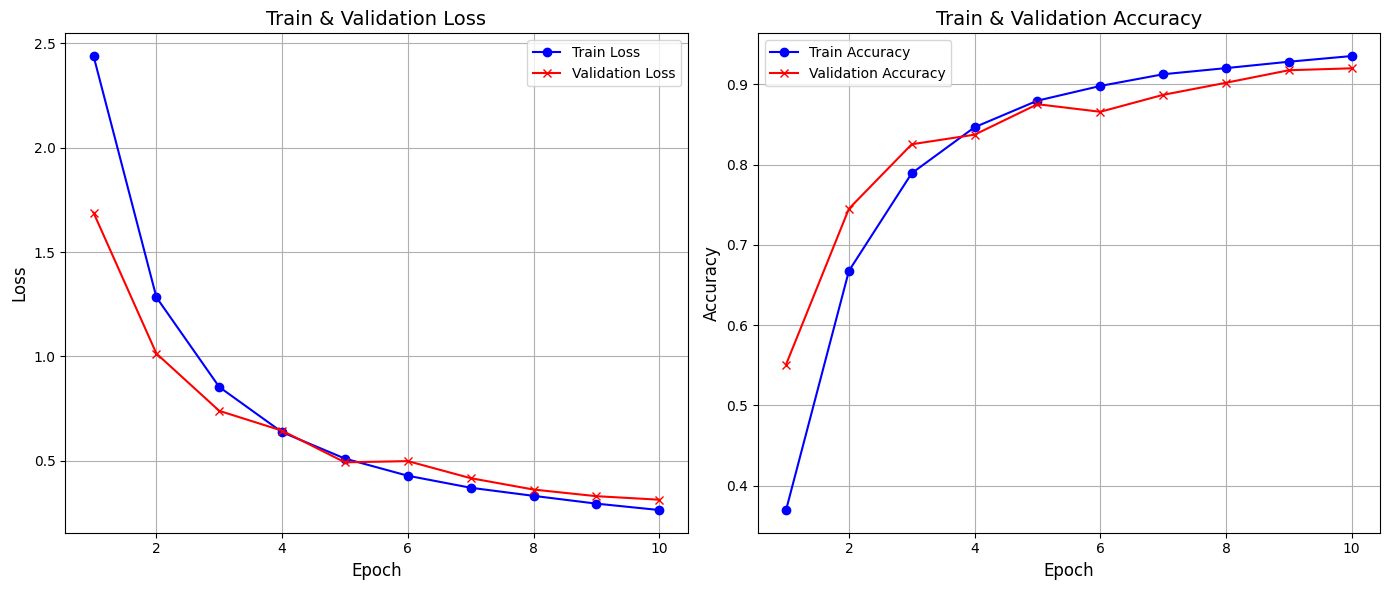

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


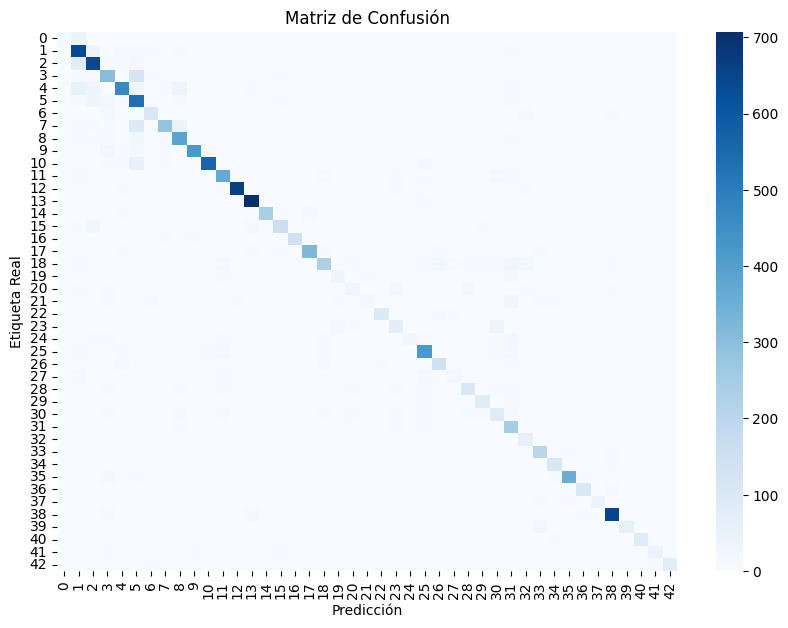

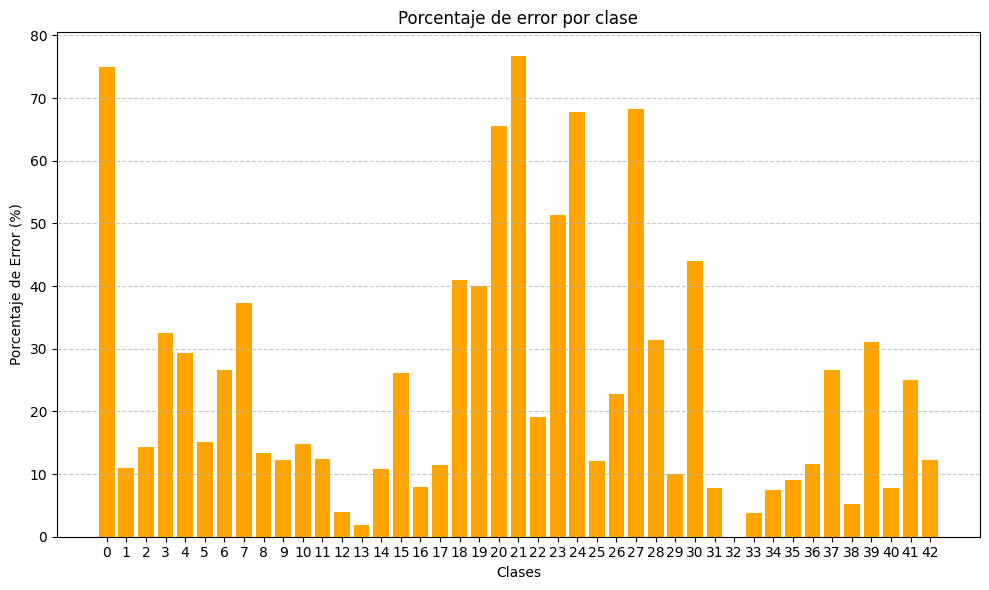

In [ ]:
from models import MLP

# Instancia el modelo
model_mlp = MLP(input_size= 3*25*25, hidden_size=100, output_size= 43)

# Instancia la función de pérdida y el optimizador
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_mlp.parameters(), lr=0.001)

# Fija 10 épocas
num_epochs = 10

# Entrena y evalua el modelo. Usa name='mlp_shuffle'
train_loss_df, val_loss_df, test_loss, test_accuracy = train_and_evaluate(model_mlp, train_loader_shuffle, valid_loader_shuffle, loss_fn, optimizer, device, num_epochs, test_loader_shuffle, name='mlp_shuffle')



# Guarda el modelo. Usa file_name='mlp_shuffle.pth'
save_full_model(model_mlp, file_name='mlp_shuffle.pth')

# Carga los datos y muéstralos
train_loss_file = 'train_loss_mlp_shuffle.csv'
valid_loss_file = 'valid_loss_mlp_shuffle.csv'
train_accuracy_file = 'train_accuracy_mlp_shuffle.csv'
valid_accuracy_file = 'valid_accuracy_mlp_shuffle.csv'

plot_loss_accuracy(train_loss_file, valid_loss_file, train_accuracy_file, valid_accuracy_file)

# Calcula la matriz de confusión
cm = plot_confusion_matrix(model_mlp, test_loader_shuffle, device=device)

# Muestra el porcentaje de error por clase
plot_error_per_class(cm)


### Entrena la CNN con:

* `train_loader_shuffle`
* `valid_loader_shuffle`
* `test_loader_shuffle`

Guarda el modelo como `cnn_shuffle.pth` y los resultados de `loss`y `accuracy` con la misma extensión:

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch [1/10], Train Loss: 2.0859, Train Accuracy: 0.4177, Validation Loss: 1.2710, Validation Accuracy: 0.6293
Epoch [2/10], Train Loss: 0.9591, Train Accuracy: 0.7186, Validation Loss: 1.0175, Validation Accuracy: 0.6900
Epoch [3/10], Train Loss: 0.6448, Train Accuracy: 0.8064, Validation Loss: 0.8206, Validation Accuracy: 0.7577
Epoch [4/10], Train Loss: 0.4809, Train Accuracy: 0.8542, Validation Loss: 0.6696, Validation Accuracy: 0.8066
Epoch [5/10], Train Loss: 0.3761, Train Accuracy: 0.8863, Validation Loss: 0.7689, Validation Accuracy: 0.7833
Epoch [6/10], Train Loss: 0.3251, Train Accuracy: 0.9019, Validation Loss: 0.6791, Validation Accuracy: 0.8002
Epoch [7/10], Train Loss: 0.2633, Train Accuracy: 0.9200, Validation Loss: 0.7015, Validation Accuracy: 0.8002
Epoch [8/10], Train Loss: 0.2349, Train Accuracy: 0.9286, Validation Loss: 0.6556, Validation Accuracy: 0.8200
Epoch [9/10], Train Loss: 0.2121, Train Accuracy: 0.9341, Validation Loss: 0.7051, Validation Accuracy: 0.8107
E

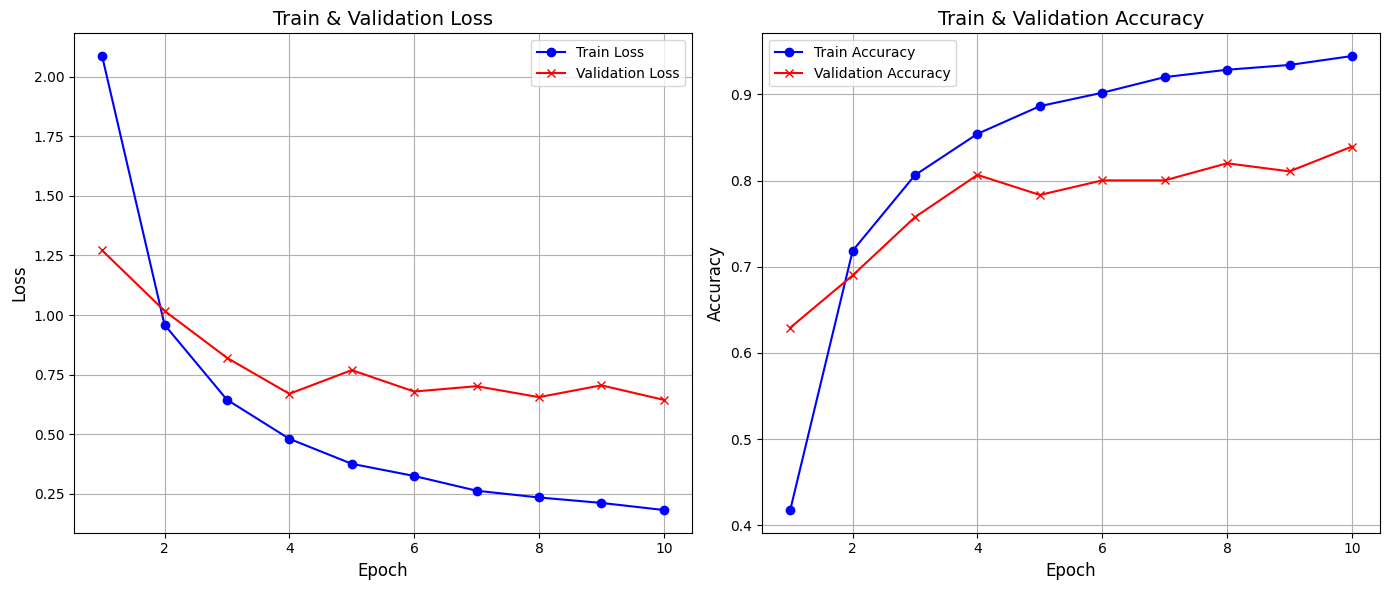

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


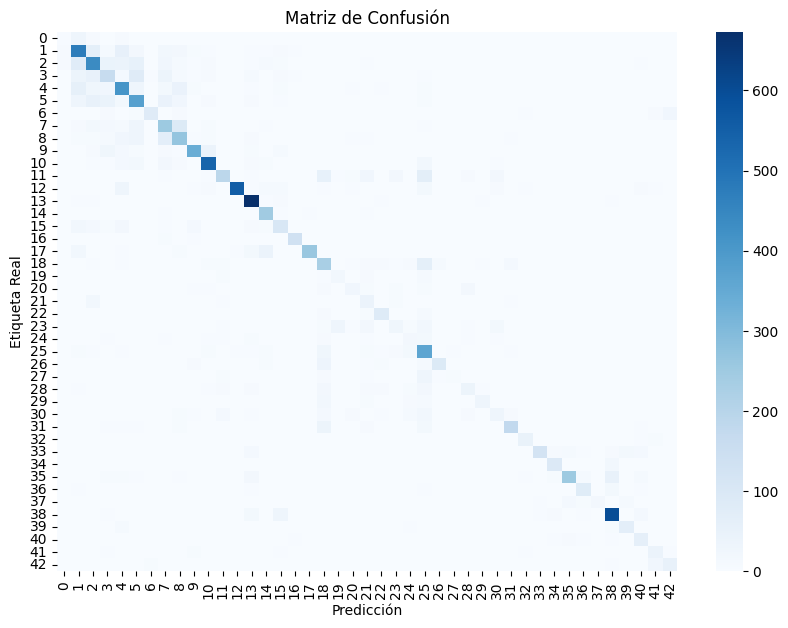

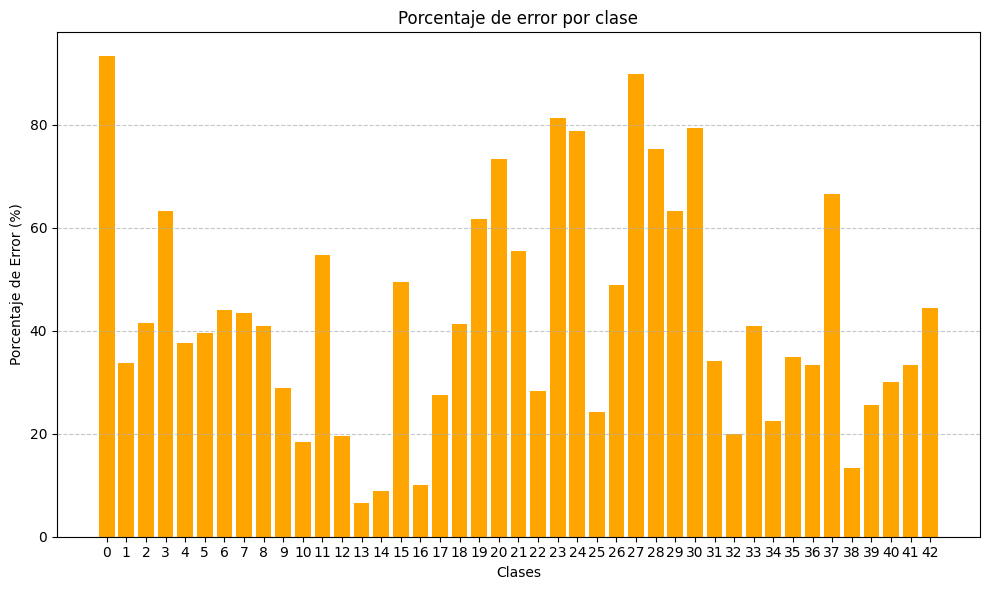

In [ ]:
# Instancia el modelo
model_cnn = CNN(ouput_dim=43)

# Instancia la función de pérdida y el optimizador
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_cnn.parameters(), lr=0.001)

# Fija 10 épocas
num_epochs = 10

# Entrena y evalua el modelo. Usa name='cnn_shuffle'
train_loss_df, val_loss_df, test_loss, test_accuracy = train_and_evaluate(model_cnn, train_loader_shuffle, valid_loader_shuffle,
                                                                          loss_fn, optimizer, device, num_epochs, test_loader_shuffle, name='cnn_shuffle')


# Guarda el modelo. Usa file_name='cnn_shuffle.pth'
save_full_model(model_cnn, file_name='cnn_shuffle.pth')

# Carga los datos y muéstralos
train_loss_file = 'train_loss_cnn_shuffle.csv'
valid_loss_file = 'valid_loss_cnn_shuffle.csv'
train_accuracy_file = 'train_accuracy_cnn_shuffle.csv'
valid_accuracy_file = 'valid_accuracy_cnn_shuffle.csv'

plot_loss_accuracy(train_loss_file, valid_loss_file, train_accuracy_file, valid_accuracy_file)

# Calcula la matriz de confusión
cm = plot_confusion_matrix(model_cnn, test_loader_shuffle, device=device)

# Muestra el porcentaje de error por clase
plot_error_per_class(cm)

¿Cómo podrías explicar los resultados?

MLP tiene un desempeño similar a cuando los píxeles no estaban permutados, debido a que no depende de donde se encuentren los píxeles.
Sin embargo, en CNN, la arquitectura está optimizada para procesar los datos en el orden normal, por lo que al hacer la permutación, perdemos la ventaja que supone CNN y obtenemos un rendimiento muy inferior incluso que el del MLP.

## **[Ejercicio 3]** Entrena una `FCNN` con las siguientes características:

1. Cuatro bloques convolucionales (conv2d -> batch norm -> ReLU).
2. Un bloque convolucional final con tantas características como clases haya (43)
3. Comprueba el número de parámetros entrenables y busca una configuración que no supere los **50.000** parámetros (aproximadamente 4 veces menos que la MLP).

In [ ]:
class FCNN(nn.Module):
    def __init__(self, output_dim):
        super(FCNN, self).__init__()

        # Primer bloque convolucional
        self.block1 = nn.Sequential(
            nn.Conv2d(3, 8, kernel_size=3, padding=1),
            nn.BatchNorm2d(8),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        # Segundo bloque convolucional
        self.block2 = nn.Sequential(
            nn.Conv2d(8, 16, kernel_size=3, padding=1),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        # Tercer bloque convolucional
        self.block3 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        # Cuarto bloque convolucional
        self.block4 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        # Bloque de salida
        self.output_block = nn.Conv2d(64, output_dim, kernel_size=1)


    def forward(self, x):
        # Primer bloque convolucional
        x = self.block1(x)

        # Segundo bloque convolucional
        x = self.block2(x)

        # Tercer bloque convolucional
        x = self.block3(x)

        # Cuarto bloque convolucional
        x = self.block4(x)

        # Capa de salida
        x = self.output_block(x)   # Salida (N, num_classes, 1, 1)
        x = x.view(x.size(0), -1)   # (N, num_classes)
        return x

count_trainable_params(FCNN(output_dim=43))

27563

Añade el modelo a tu archivo `models.py`.

### Entrena la FCNN con el dataset original (sin permutar)

* `train_loader`
* `valid_loader`
* `test_loader`

Guarda el modelo como `fcnn.pth` y los resultados de `loss`y `accuracy` con la misma extensión:

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch [1/10], Train Loss: 1.4351, Train Accuracy: 0.6032, Validation Loss: 0.6055, Validation Accuracy: 0.8207
Epoch [2/10], Train Loss: 0.4048, Train Accuracy: 0.8873, Validation Loss: 0.3020, Validation Accuracy: 0.9168
Epoch [3/10], Train Loss: 0.2238, Train Accuracy: 0.9368, Validation Loss: 0.2168, Validation Accuracy: 0.9326
Epoch [4/10], Train Loss: 0.1516, Train Accuracy: 0.9575, Validation Loss: 0.1547, Validation Accuracy: 0.9562
Epoch [5/10], Train Loss: 0.1174, Train Accuracy: 0.9658, Validation Loss: 0.1640, Validation Accuracy: 0.9499
Epoch [6/10], Train Loss: 0.0885, Train Accuracy: 0.9750, Validation Loss: 0.1472, Validation Accuracy: 0.9541
Epoch [7/10], Train Loss: 0.0802, Train Accuracy: 0.9759, Validation Loss: 0.1134, Validation Accuracy: 0.9660
Epoch [8/10], Train Loss: 0.0760, Train Accuracy: 0.9765, Validation Loss: 0.1162, Validation Accuracy: 0.9654
Epoch [9/10], Train Loss: 0.0528, Train Accuracy: 0.9847, Validation Loss: 0.1138, Validation Accuracy: 0.9645
E

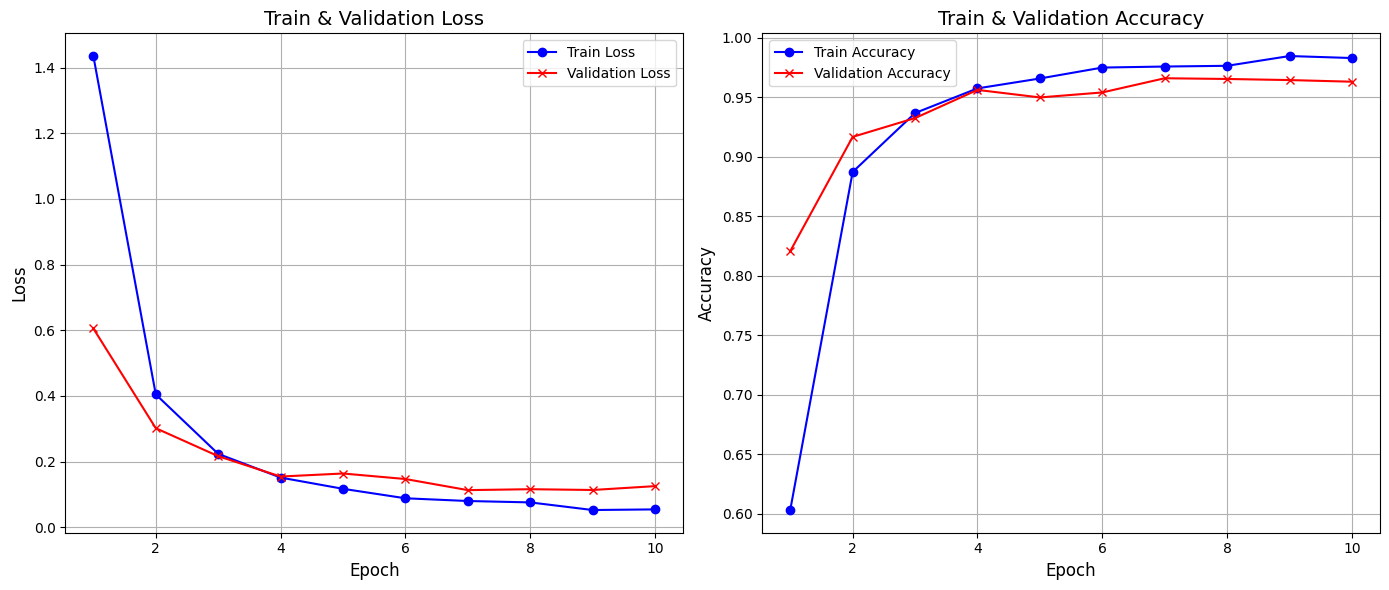

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


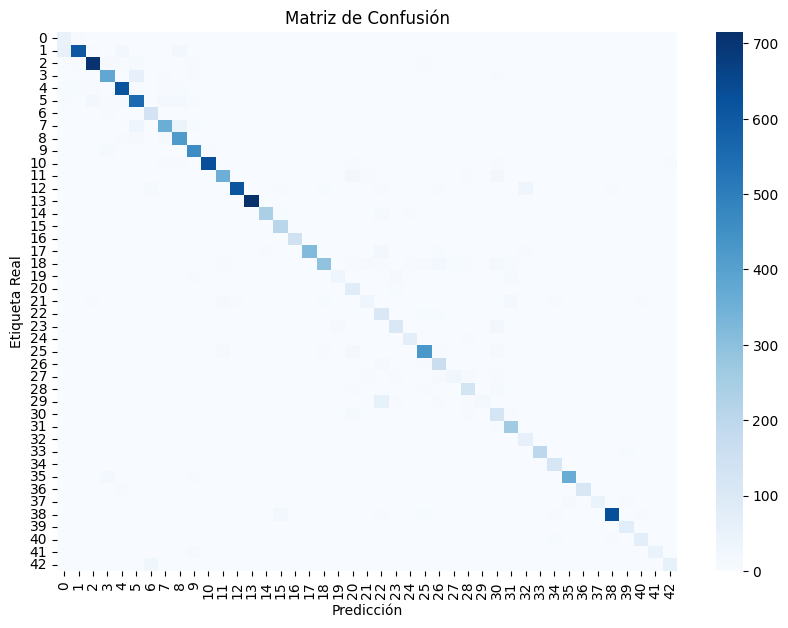

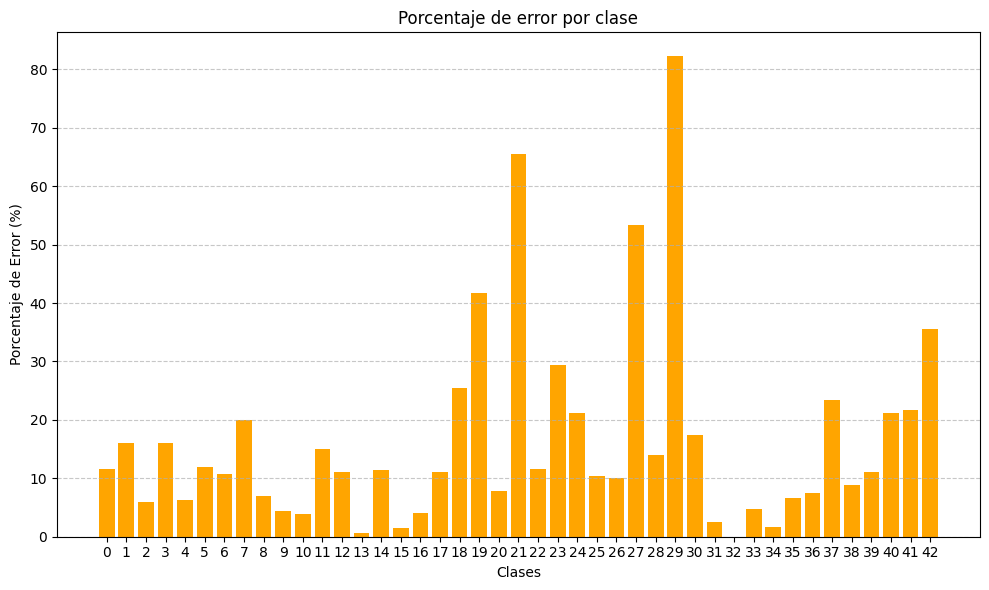

In [ ]:
# Instancia el modelo
model_fcnn = FCNN(output_dim=43)

# Instancia la función de pérdida y el optimizador
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_fcnn.parameters(), lr=0.001)

# Fija 10 épocas
num_epochs = 10

# Entrena y evalua el modelo. Usa name='fcnn'
train_loss_df, val_loss_df, test_loss, test_accuracy = train_and_evaluate(model_fcnn, train_loader, valid_loader, loss_fn, optimizer, device, num_epochs, test_loader, name='fcnn')


# Guarda el modelo. Usa file_name='fcnn.pth'
save_full_model(model_fcnn, file_name='fcnn.pth')


# Carga los datos y muéstralos
train_loss_file = 'train_loss_fcnn.csv'
valid_loss_file = 'valid_loss_fcnn.csv'
train_accuracy_file = 'train_accuracy_fcnn.csv'
valid_accuracy_file = 'valid_accuracy_fcnn.csv'

plot_loss_accuracy(train_loss_file, valid_loss_file, train_accuracy_file, valid_accuracy_file)

# Calcula la matriz de confusión
cm = plot_confusion_matrix(model_fcnn, test_loader, device=device)

# Muestra el porcentaje de error por clase
plot_error_per_class(cm)

# **[Ejercicio 4]** Reto final: entrena el mejor modelo que puedas.

1. Crea un modelo con las características que quieras siempre y cuando no supere los **200.000** parámetros.
2. Entrena con el optimizador y estrategias (`learning rate schedulers`, `normalization`, etc) que quieras, siempre y cuando no entrenes más de **10 épocas**.
3. Puedes normalizar los datos y hacer data-augmentation.
4. Guarda el modelo en tu archivo `models.py` y llámalo: `MyBestModel`.

In [5]:
class MyBestModel(nn.Module):
    def __init__(self, output_dim):
        super(MyBestModel, self).__init__()

        # Primer bloque convolucional
        self.block1 = nn.Sequential(
            nn.Conv2d(3, 20, kernel_size=3, padding=1),
            nn.BatchNorm2d(20),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        # Segundo bloque convolucional
        self.block2 = nn.Sequential(
            nn.Conv2d(20, 45, kernel_size=3, padding=1),
            nn.BatchNorm2d(45),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        # Tercer bloque convolucional
        self.block3 = nn.Sequential(
            nn.Conv2d(45, 90, kernel_size=3, padding=1),
            nn.BatchNorm2d(90),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        # Cuarto bloque convolucional
        self.block4 = nn.Sequential(
            nn.Conv2d(90, 180, kernel_size=3, padding=1),
            nn.BatchNorm2d(180),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )


        # Bloque de salida
        self.output_block = nn.Conv2d(180, output_dim, kernel_size=1)


    def forward(self, x):
        # Primer bloque convolucional
        x = self.block1(x)

        # Segundo bloque convolucional
        x = self.block2(x)

        # Tercer bloque convolucional
        x = self.block3(x)

        # Cuarto bloque convolucional
        x = self.block4(x)

        # Capa de salida
        x = self.output_block(x)   # Salida (N, num_classes, 1, 1)
        x = x.view(x.size(0), -1)   # (N, num_classes)
        return x

count_trainable_params(MyBestModel(output_dim=43))

199678

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch [1/10], Train Loss: 0.7798, Train Accuracy: 0.7857, Validation Loss: 0.2775, Validation Accuracy: 0.9144
Epoch [2/10], Train Loss: 0.1167, Train Accuracy: 0.9683, Validation Loss: 0.0964, Validation Accuracy: 0.9753
Epoch [3/10], Train Loss: 0.0635, Train Accuracy: 0.9821, Validation Loss: 0.0846, Validation Accuracy: 0.9737
Epoch [4/10], Train Loss: 0.0545, Train Accuracy: 0.9849, Validation Loss: 0.0574, Validation Accuracy: 0.9840
Epoch [5/10], Train Loss: 0.0392, Train Accuracy: 0.9887, Validation Loss: 0.0784, Validation Accuracy: 0.9799
Epoch [6/10], Train Loss: 0.0430, Train Accuracy: 0.9877, Validation Loss: 0.1021, Validation Accuracy: 0.9692
Epoch [7/10], Train Loss: 0.0222, Train Accuracy: 0.9936, Validation Loss: 0.0913, Validation Accuracy: 0.9730
Epoch [8/10], Train Loss: 0.0272, Train Accuracy: 0.9926, Validation Loss: 0.0415, Validation Accuracy: 0.9875
Epoch [9/10], Train Loss: 0.0202, Train Accuracy: 0.9945, Validation Loss: 0.1040, Validation Accuracy: 0.9682
E

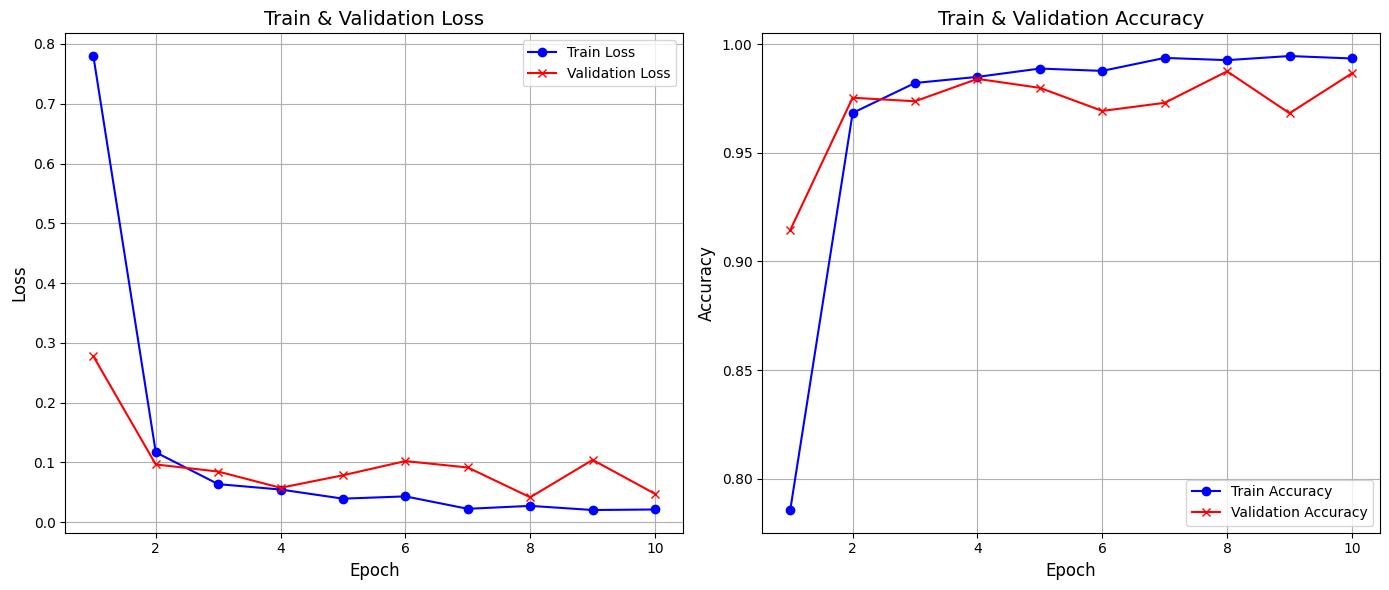

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


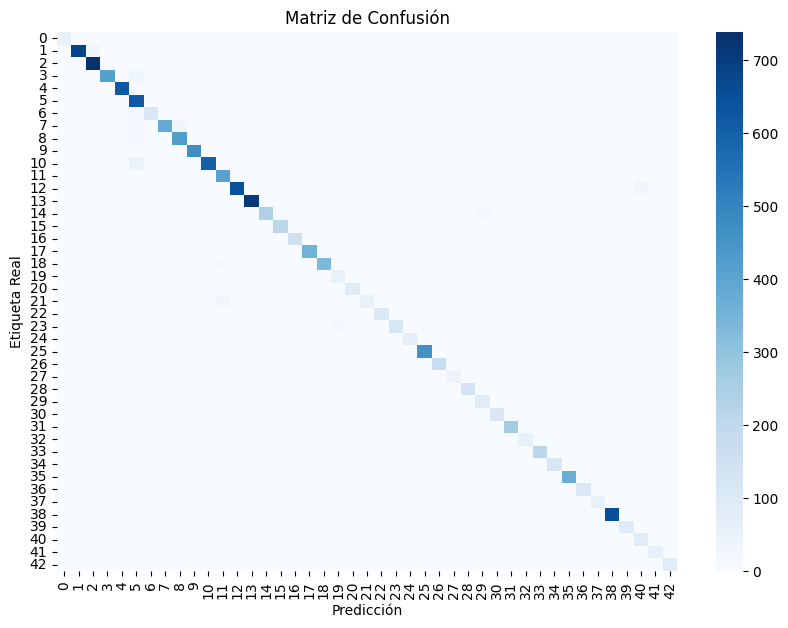

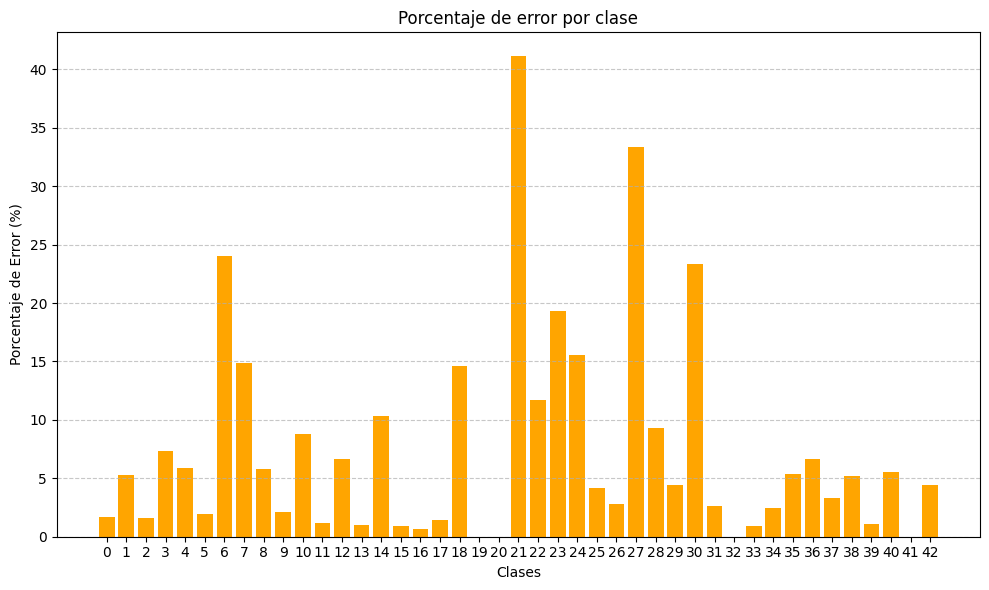

In [12]:

# Instancia el modelo
model = MyBestModel(output_dim=43).to(device)

# Instancia la función de pérdida y el optimizador
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Fija 10 épocas
num_epochs = 10

# Entrena y evalua el modelo.
train_loss_df, val_loss_df, test_loss, test_accuracy = train_and_evaluate(model, train_loader, valid_loader, loss_fn, optimizer, device, num_epochs, test_loader, name='myBest')

# Guarda el modelo. Usa file_name='fcnn.pth'
save_full_model(model, file_name='myBest.pth')


# Carga los datos y muéstralos
train_loss_file = 'train_loss_myBest.csv'
valid_loss_file = 'valid_loss_myBest.csv'
train_accuracy_file = 'train_accuracy_myBest.csv'
valid_accuracy_file = 'valid_accuracy_myBest.csv'

plot_loss_accuracy(train_loss_file, valid_loss_file, train_accuracy_file, valid_accuracy_file)

# Calcula la matriz de confusión
cm = plot_confusion_matrix(model, test_loader, device=device)

# Muestra el porcentaje de error por clase
plot_error_per_class(cm)